# Original IntAct Data: Instances That Change Based on Interactor

In [1]:
from datetime import datetime

from src.helpers.helpers_predator.preprocessing import mutation_effect_label_binner

print("\033[32m{}\033[0m".format(datetime.now().strftime("%B %d, %Y %H:%M:%S")))

March 16, 2022 18:47:19


In [2]:
import pandas as pd

# INTACT_DATA_PATH = r"C:\Users\ibrah\Desktop\TUSEB_Study\Prediction_of_Mutation_Effects\Intact_Mutation_Dataset\mutations.tsv"
INTACT_DATA_PATH = r"C:\Users\ibrah\Desktop\Spaceship\Reproducable_science\tasks_IntAct_2021-10-18\processed_data_v3.1.csv"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [3]:
intact_data = pd.read_csv(INTACT_DATA_PATH)

In [4]:
intact_data

,Mutation Effect Label,Affected Protein AC,Mutation,Interaction Participant
0,mutation causing(MI:2227),Q06124-2,D425A,Q6P1J9
1,mutation causing(MI:2227),Q06124-2,C459S,Q6P1J9
2,mutation causing(MI:2227),Q06124-2,Y279C,Q6P1J9
3,mutation causing(MI:2227),P04264,L161P,P37198
4,mutation causing(MI:2227),P45381,E285A,Q14145
...,...,...,...,...
36165,mutation with no effect(MI:2226),P0C0S8,K14R,Q12888
36166,mutation with no effect(MI:2226),P01024,R712W,P15529
36167,mutation with no effect(MI:2226),P18074,R683W,P24928
36168,mutation with no effect(MI:2226),P36776-1,P676S,Q00059


In [5]:
from src.helpers.helpers_analysis.convert_primary_isomer import convert_primary_isomer

In [6]:
intact_data = convert_primary_isomer("Affected Protein AC", intact_data)
intact_data = convert_primary_isomer("Interaction Participant", intact_data)

In [7]:
intact_data

,Mutation Effect Label,Affected Protein AC,Mutation,Interaction Participant
0,mutation causing(MI:2227),Q06124,D425A,Q6P1J9
1,mutation causing(MI:2227),Q06124,C459S,Q6P1J9
2,mutation causing(MI:2227),Q06124,Y279C,Q6P1J9
3,mutation causing(MI:2227),P04264,L161P,P37198
4,mutation causing(MI:2227),P45381,E285A,Q14145
...,...,...,...,...
36165,mutation with no effect(MI:2226),P0C0S8,K14R,Q12888
36166,mutation with no effect(MI:2226),P01024,R712W,P15529
36167,mutation with no effect(MI:2226),P18074,R683W,P24928
36168,mutation with no effect(MI:2226),P36776,P676S,Q00059


In [8]:
intact_data = mutation_effect_label_binner(intact_data, "Mutation Effect Label")
intact_data

,Mutation Effect Label,Affected Protein AC,Mutation,Interaction Participant
0,0,Q15208,R41A,Q9H8S9
1,0,P54198,R460A,Q9Y294
2,0,P54198,R459A,Q9Y294
3,0,P54198,I461D,Q9Y294
4,0,P54198,L464D,Q9Y294
...,...,...,...,...
30334,1,P0C0S8,K14R,Q12888
30335,1,P01024,R712W,P15529
30336,1,P18074,R683W,P24928
30337,1,P36776,P676S,Q00059


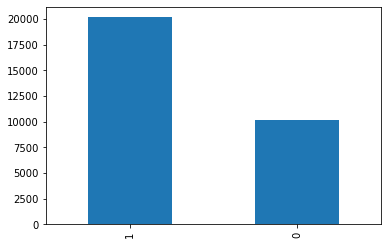

In [9]:
intact_data["Mutation Effect Label"].value_counts().plot(kind="bar");

In [10]:
ans = (
    intact_data.loc[intact_data[["Affected Protein AC", "Mutation"]].duplicated(keep=False)]
        .drop_duplicates()
        .groupby(["Affected Protein AC", "Mutation"])
        .filter(lambda x: x["Mutation Effect Label"].nunique() > 1)
)

In [11]:
ans = ans.sort_values(by=["Affected Protein AC", "Mutation"])

In [12]:
ans

,Mutation Effect Label,Affected Protein AC,Mutation,Interaction Participant
5198,0,A0A0C4DFT7,E24G,O43765
5899,0,A0A0C4DFT7,E24G,Q14145
16621,1,A0A0C4DFT7,E24G,O43889
4503,0,A0A0C4DFT7,R50W,O43765
5905,0,A0A0C4DFT7,R50W,Q14145
...,...,...,...,...
10415,1,Q9Y5W5,I155R,O00755
5583,0,Q9Y6H1,T61I,Q8WYQ3
11466,1,Q9Y6H1,T61I,Q8WYQ3
6921,0,Q9Y6W8,Y180F,P27986


In [13]:
ans = ans[
    ~ans[["Affected Protein AC", "Mutation", "Interaction Participant"]].duplicated(keep=False)
].copy()

In [14]:
ans

,Mutation Effect Label,Affected Protein AC,Mutation,Interaction Participant
5198,0,A0A0C4DFT7,E24G,O43765
5899,0,A0A0C4DFT7,E24G,Q14145
16621,1,A0A0C4DFT7,E24G,O43889
4503,0,A0A0C4DFT7,R50W,O43765
5905,0,A0A0C4DFT7,R50W,Q14145
...,...,...,...,...
1200,0,Q9Y530,D125A,Q53GL7
2147,0,Q9Y5W5,I155R,P41221
10415,1,Q9Y5W5,I155R,O00755
6921,0,Q9Y6W8,Y180F,P27986


In [15]:
ans.to_csv("OriginalIntActDifferentEffectDifferentPartner.csv", index=False)